<a href="https://colab.research.google.com/github/earth-math/WS-AIcamp/blob/main/K_mean_(%EA%B5%B0%EC%A7%91%ED%99%94)%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **K-mean**

## **데이터 준비**

Scikit-Learn은 머신러닝을 위한 파이썬 패키지이며, clustering을 할 수 있는 가상의 데이터셋을 만들어주는 함수들을 제공한다. 오늘은 그 중 하나인 make_blobs()를 사용해서 데이터셋을 만들어보자.

In [ ]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("Set2")

In [ ]:
x, y = make_blobs(n_samples=100, centers=4, n_features=2, random_state=6)
points = pd.DataFrame(x, y).reset_index(drop=True)
points.columns = ["x", "y"]
points.head()
[Out]
make_blobs()

(array([[  0.8966376 ,  -1.13882433],
        [  1.59991388,  -1.94290911],
        [  9.19164643,  -1.60705083],
        [  9.60895752,  -2.53105685],
        [ 11.16437886,  -0.97766058],
        [ 11.96812153,  -1.1477513 ],
        [ -8.91665088,  -4.7177408 ],
        [  3.12551329,  -1.35127113],
        [ 10.35824701,  -2.96692361],
        [  1.53150743,  -4.18280407],
        [  3.56198995,  -1.62041154],
        [  1.83760474,  -2.18379095],
        [  3.76608997,  -3.48104855],
        [  1.99588271,  -2.32679011],
        [ 10.18109025,  -1.91994392],
        [  1.30283772,  -2.18182211],
        [  1.82477871,  -1.05127998],
        [  3.43372111,  -1.86890049],
        [  2.23766341,  -3.97841588],
        [  4.30154844,  -2.32837195],
        [ 10.80071269,  -1.44290818],
        [-10.36435528,  -4.33294715],
        [ -9.68519921,  -6.98404238],
        [ -8.38521549,  -3.27606749],
        [  9.29165438,  -2.13435216],
        [  2.53916015,  -1.33831019],
        [ 10

## **Step 1. k값 정하기**
k-means clustering이란 이름에서 알 수 있듯이 주어진 데이터셋을 k개의 중심점을 기준으로 하여 그룹짓는 방법이다. 따라서, 중심점을 몇 개로 할 것인지를 미리 정해줘야 한다.

<ipython-input-5-c5240bae6d6d>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="x", y="y", data=points, palette="Set2");


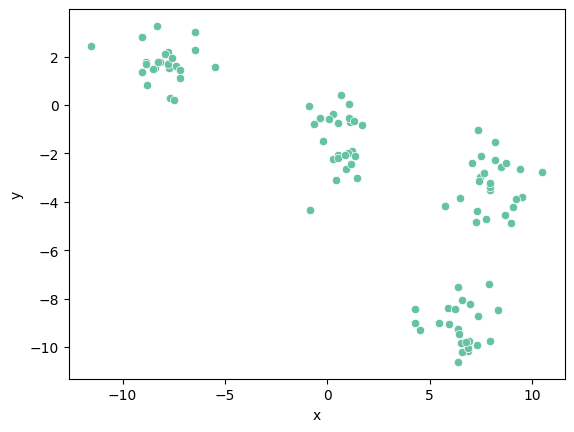

In [ ]:
sns.scatterplot(x="x", y="y", data=points, palette="Set2");

위 그래프는 우리가 만든 데이터셋을 scatter plot으로 그려본 것이다. 데이터의 분포를 보니 k값이 4 정도면 적당한 cluster들을 얻을 수 있을 것 같다. 따라서, k=4로 해보자.



## **Step 2. 중심점(Centroid) 구하기**
k값을 정했으니 이제 중심점을 구해야 한다. 중심점이란 말 그대로 각 cluster의 중심 좌표를 말한다. 2차원 데이터를 예로 들면 각 cluster의 중심점은 각 cluster의 x좌표의 평균과 y좌표의 평균이 된다. 단, clustering을 시작할 때는 아직 cluster가 생성되지 않았고 따라서 cluster의 중심점을 구할 수 없기 때문에 전체 데이터 중에서 랜덤한 k개의 데이터를 중심점으로 사용한다.

In [ ]:
centroids = points.sample(4, random_state=1)
centroids

,x,y
80,-8.842286,1.786914
84,4.510561,-9.305970
33,5.883975,-8.372845
81,-8.831594,1.690414


## **Step3. 각 중심점으로부터의 거리를 구하여 가까운 중심점의 cluster로 할당하기**
 각 데이터에 대해서 4개의 중심점과의 거리를 계산한다. 그 후 값을 비교하여 가장 가까운 중심점의 cluster로 해당 데이터를 할당한다.

In [ ]:
# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance = sp.spatial.distance.cdist(points, centroids, "euclidean")

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num = np.argmin(distance, axis=1)

# 결과 확인
result = points.copy()
result["cluster"] = np.array(cluster_num)
result.head()

,x,y,cluster
0,0.276181,-2.217047,3
1,7.927368,-9.761527,0
2,8.491428,-2.549749,2
3,-11.537102,2.434883,2
4,4.292259,-8.992204,0


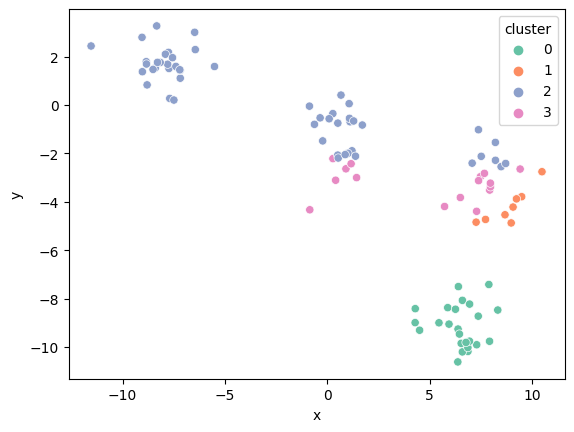

In [ ]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result, palette="Set2");

## **Step 4. 변경된 cluster에 대해서 중심점 구하기**
각 cluster에 대해서 중심점을 구해보자. 위에서 언급했듯이, 2차원 데이터셋일 때 cluster의 중심점은 x좌표의 평균과 y좌표의 평균이다.

In [ ]:
# cluster별로 묶어서 평균 계산
centroids_2 = result.groupby("cluster").mean()
centroids_2

,x,y
cluster,,
0,6.484457,-9.149550
1,8.871260,-4.203678
2,-2.592793,0.186325
3,4.919472,-3.239619


In [ ]:
# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance = sp.spatial.distance.cdist(points, centroids_2, "euclidean")

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num = np.argmin(distance, axis=1)

# 결과 확인
result = points.copy()
result["cluster"] = np.array(cluster_num)
result.head()

,x,y,cluster
0,0.276181,-2.217047,2
1,7.927368,-9.761527,0
2,8.491428,-2.549749,1
3,-11.537102,2.434883,2
4,4.292259,-8.992204,0


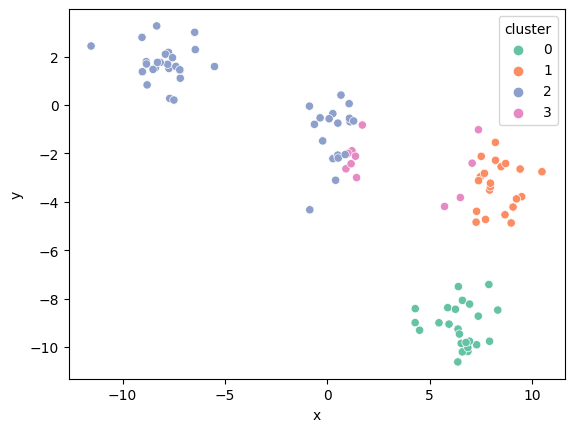

In [ ]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result, palette="Set2");

## **다시 학습시키자**

In [ ]:
# cluster별로 묶어서 평균 계산
centroids_3 = result.groupby("cluster").mean()
centroids_3

,x,y
cluster,,
0,6.484457,-9.149550
1,8.345980,-3.363875
2,-4.496008,0.489193
3,3.228356,-2.395878


In [ ]:
# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance = sp.spatial.distance.cdist(points, centroids_3, "euclidean")

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num = np.argmin(distance, axis=1)

# 결과 확인
result = points.copy()
result["cluster"] = np.array(cluster_num)
result.head()

,x,y,cluster
0,0.276181,-2.217047,3
1,7.927368,-9.761527,0
2,8.491428,-2.549749,1
3,-11.537102,2.434883,2
4,4.292259,-8.992204,0


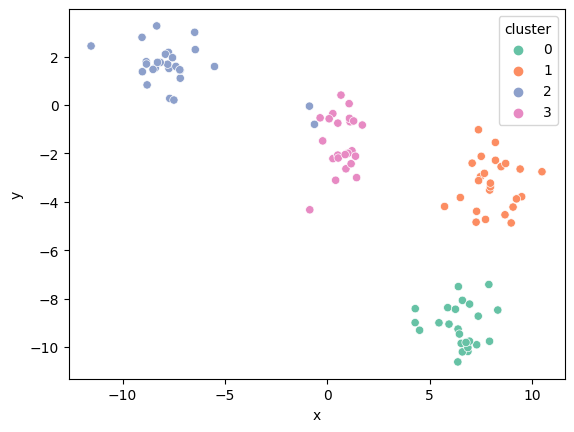

In [ ]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result, palette="Set2");

## **다시 학습시키자**

In [ ]:
# cluster별로 묶어서 평균 계산
centroids_4 = result.groupby("cluster").mean()
centroids_4

,x,y
cluster,,
0,6.484457,-9.149550
1,8.078367,-3.283553
2,-7.430279,1.561428
3,0.700327,-1.566543


In [ ]:
# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance = sp.spatial.distance.cdist(points, centroids_4, "euclidean")

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num = np.argmin(distance, axis=1)

# 결과 확인
result = points.copy()
result["cluster"] = np.array(cluster_num)
result.head()

,x,y,cluster
0,0.276181,-2.217047,3
1,7.927368,-9.761527,0
2,8.491428,-2.549749,1
3,-11.537102,2.434883,2
4,4.292259,-8.992204,0


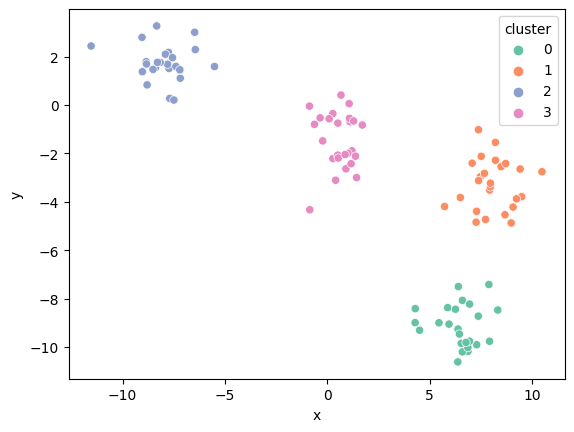

In [ ]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result, palette="Set2");

## **엘보 플롯 그리기**


k값의 변화에 따라 오차제곱합(SSE)를 값에 따라 전부 계산하면 값이 급격히 줄어드는 부분이 생긴다. 이것을 팔꿈치(elbow point)라고 하고, 이 부분에 해당하는 k값을 구하면 가장 최적의 k값을 구할 수 있다.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

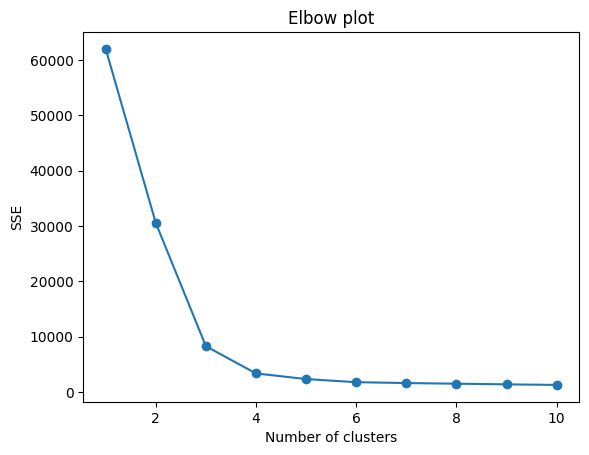

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 랜덤 데이터 생성
X, y = make_blobs(n_samples=1000, centers=6, random_state=42)

# SSE 값을 저장할 빈 리스트 생성
sse = []

# 클러스터 개수를 1에서 10까지 변경하며 KMeans 모델 생성 및 학습
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # 클러스터 내 SSE 값 계산
    sse.append(kmeans.inertia_)

# SSE 값을 시각화
plt.plot(range(1, 11), sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow plot')
plt.show()